In [12]:
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

mnist =  fetch_openml("mnist_784", as_frame = False)
data, target = mnist.data , mnist.target

In [13]:
train_data, test_data, train_target, test_target = data[:60000], data[60000:], target[:60000], target[60000:]

In [14]:
train_target

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [15]:
svm_clf = SVC(random_state = 42)
svm_clf.fit(train_data[:2000], train_target[:2000])

SVC(random_state=42)

In [16]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [17]:
svm_clf.predict([train_data[0]])

array(['5'], dtype=object)

In [18]:
# making the prediction manually 
train_data_0_score =  svm_clf.decision_function([train_data[0]])
train_data_0_score
# the biggest score(9.3015) in index 5 so the prediction is index 5 

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [19]:
max_idx =  train_data_0_score.argmax() #5
svm_clf.classes_[max_idx]

'5'

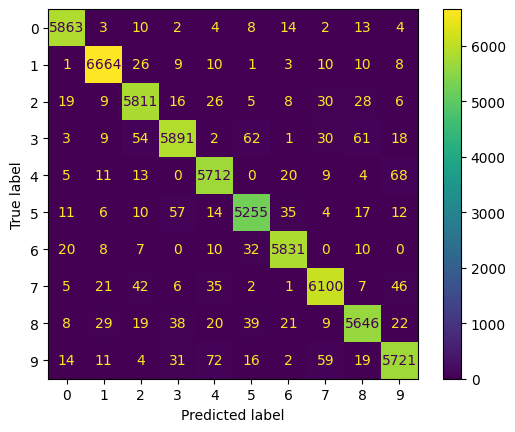

In [20]:
pred_data = cross_val_predict(svm_clf, train_data, train_target, cv = 3)

ConfusionMatrixDisplay.from_predictions(train_target, pred_data)

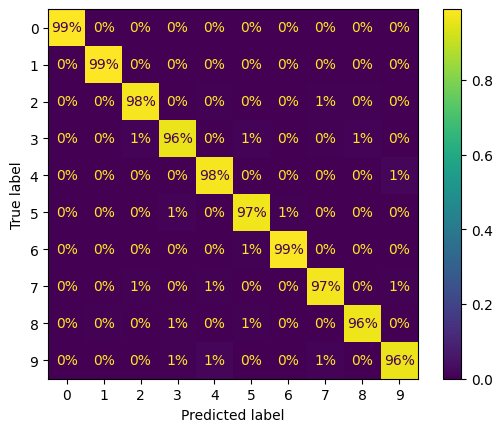

In [22]:
ConfusionMatrixDisplay.from_predictions(train_target, pred_data, normalize= 'true', values_format ='.0%')

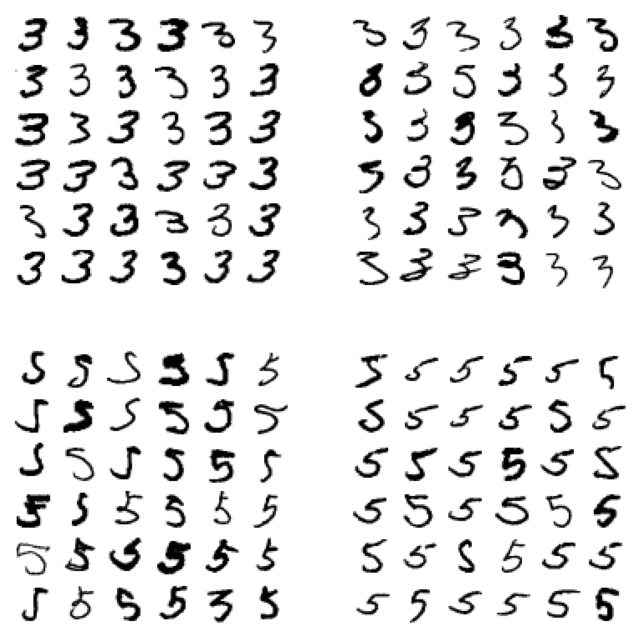

In [29]:
import numpy as np 
import matplotlib.pyplot as plt
cl_a, cl_b = '3', '5'

x_aa = train_data[(train_target == cl_a) & (pred_data == cl_a)]
x_ab = train_data[(train_target == cl_a) & (pred_data == cl_b)]
x_bb = train_data[(train_target == cl_b) & (pred_data == cl_b)]
x_ba = train_data[(train_target == cl_b) & (pred_data == cl_a)]

def plot_digits(instances, images_per_row = 10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows =  (len(instances) -1 ) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis = 1))
    image = np.concatenate(row_images, axis = 0)
    plt.imshow(image, cmap = "binary", **options)
    plt.axis("off")

plt.figure(figsize = (8,8))
plt.subplot(221); plot_digits(x_aa[:36], images_per_row = 6)
plt.subplot(222); plot_digits(x_ab[:36], images_per_row = 6)
plt.subplot(223); plot_digits(x_ba[:36], images_per_row = 6)
plt.subplot(224); plot_digits(x_bb[:36], images_per_row = 6)